# **Análise e Modelos de Insurance Claims**

Este notebook realiza uma análise exploratória de dados (EDA) e modelagem preditiva no dataset de "insurance claims". O objetivo é entender como as características dos segurados influenciam o resultado das reclamações de seguro (OUTCOME) e construir um modelo preditivo.

## **1. Importação das Bibliotecas**

In [3]:
# Bibliotecas para análise de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configurações de visualização
sns.set_theme(style="whitegrid")  # Define o tema do Seaborn (pode ser "whitegrid", "darkgrid", etc.)
sns.set_palette("Set2")  # Define a paleta de cores
%matplotlib inline

## **2. Carregamento e Exploração Inicial do Dataset**
### **2.1 Carregar o Dataset**

In [4]:
# Carregar o dataset
url = 'https://drive.google.com/uc?export=download&id=1wgUnkmZ1H0ew-uBpQCJUKxrYOQCqyy2q'
df = pd.read_csv(url)

# Visualizar as primeiras linhas
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied


### **2.2 Informações Gerais**

In [32]:
# Informações sobre o dataset
print("Informações sobre o dataset:")
df.info()

# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(df.describe())

# Estatísticas descritivas para colunas categóricas
print("\nEstatísticas descritivas para colunas categóricas:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColuna: {col}")
    print(df[col].value_counts())

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10000 non-null  int64  
 1   AGE                       10000 non-null  object 
 2   DRIVING_EXPERIENCE        10000 non-null  object 
 3   CREDIT_SCORE              10000 non-null  float64
 4   VEHICLE_OWNERSHIP         10000 non-null  object 
 5   MARRIED                   10000 non-null  object 
 6   CHILDREN                  10000 non-null  object 
 7   LOCALITY                  10000 non-null  object 
 8   ANNUAL_MILEAGE            10000 non-null  float64
 9   SPEEDING_VIOLATIONS       10000 non-null  int64  
 10  DUIS                      10000 non-null  int64  
 11  PAST_ACCIDENTS            10000 non-null  int64  
 12  OUTCOME                   10000 non-null  object 
 13  GENDER_male               10000 n

### **2.3 Verificação de Dados Faltantes**

In [6]:
# Verificar dados faltantes
df.isnull().sum()

,0
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


## **3. Análise Exploratória de Dados (EDA)**
### **3.1 Distribuição das Features Numéricas**

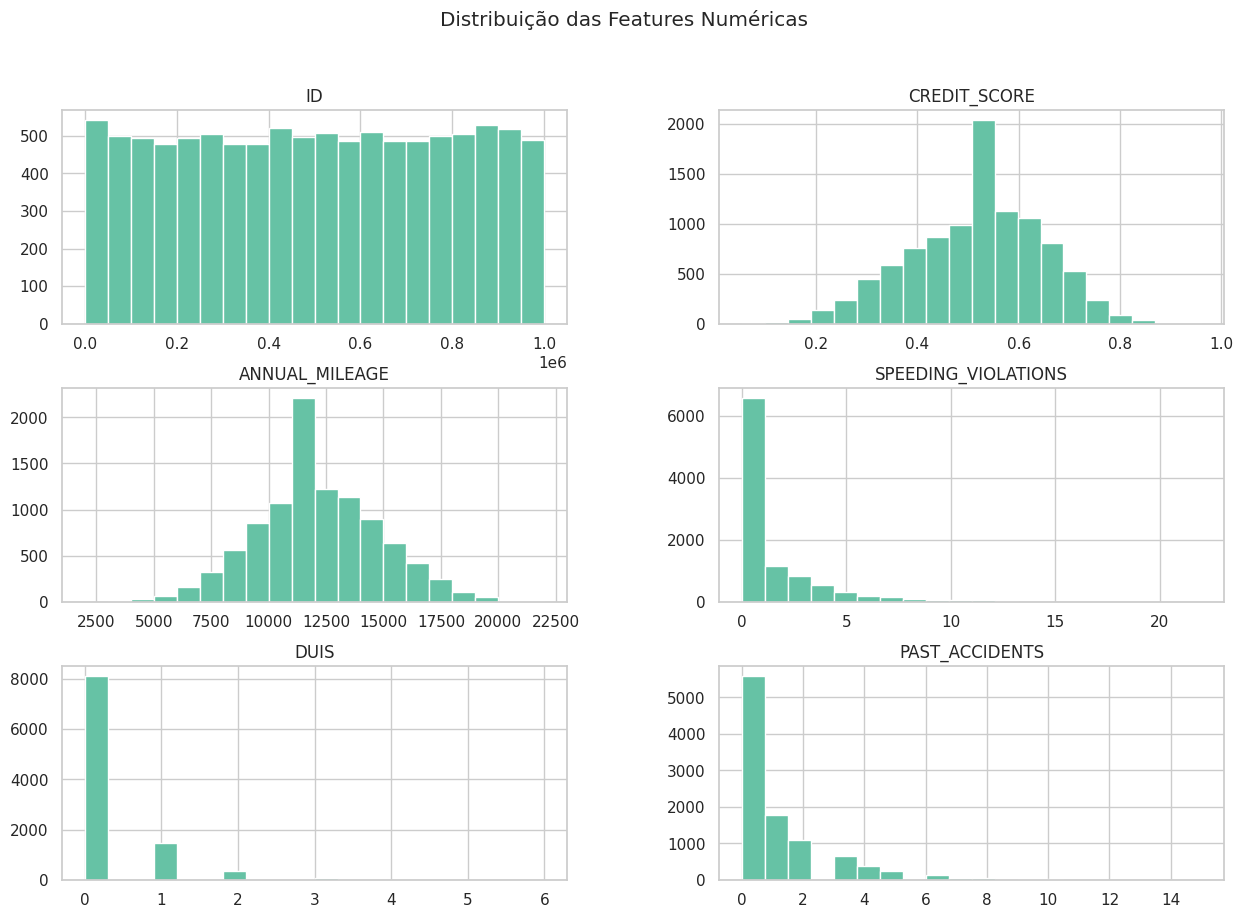

In [7]:
# Histogramas para features numéricas
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribuição das Features Numéricas')
plt.show()

### **3.2 Distribuição das Features Categóricas**

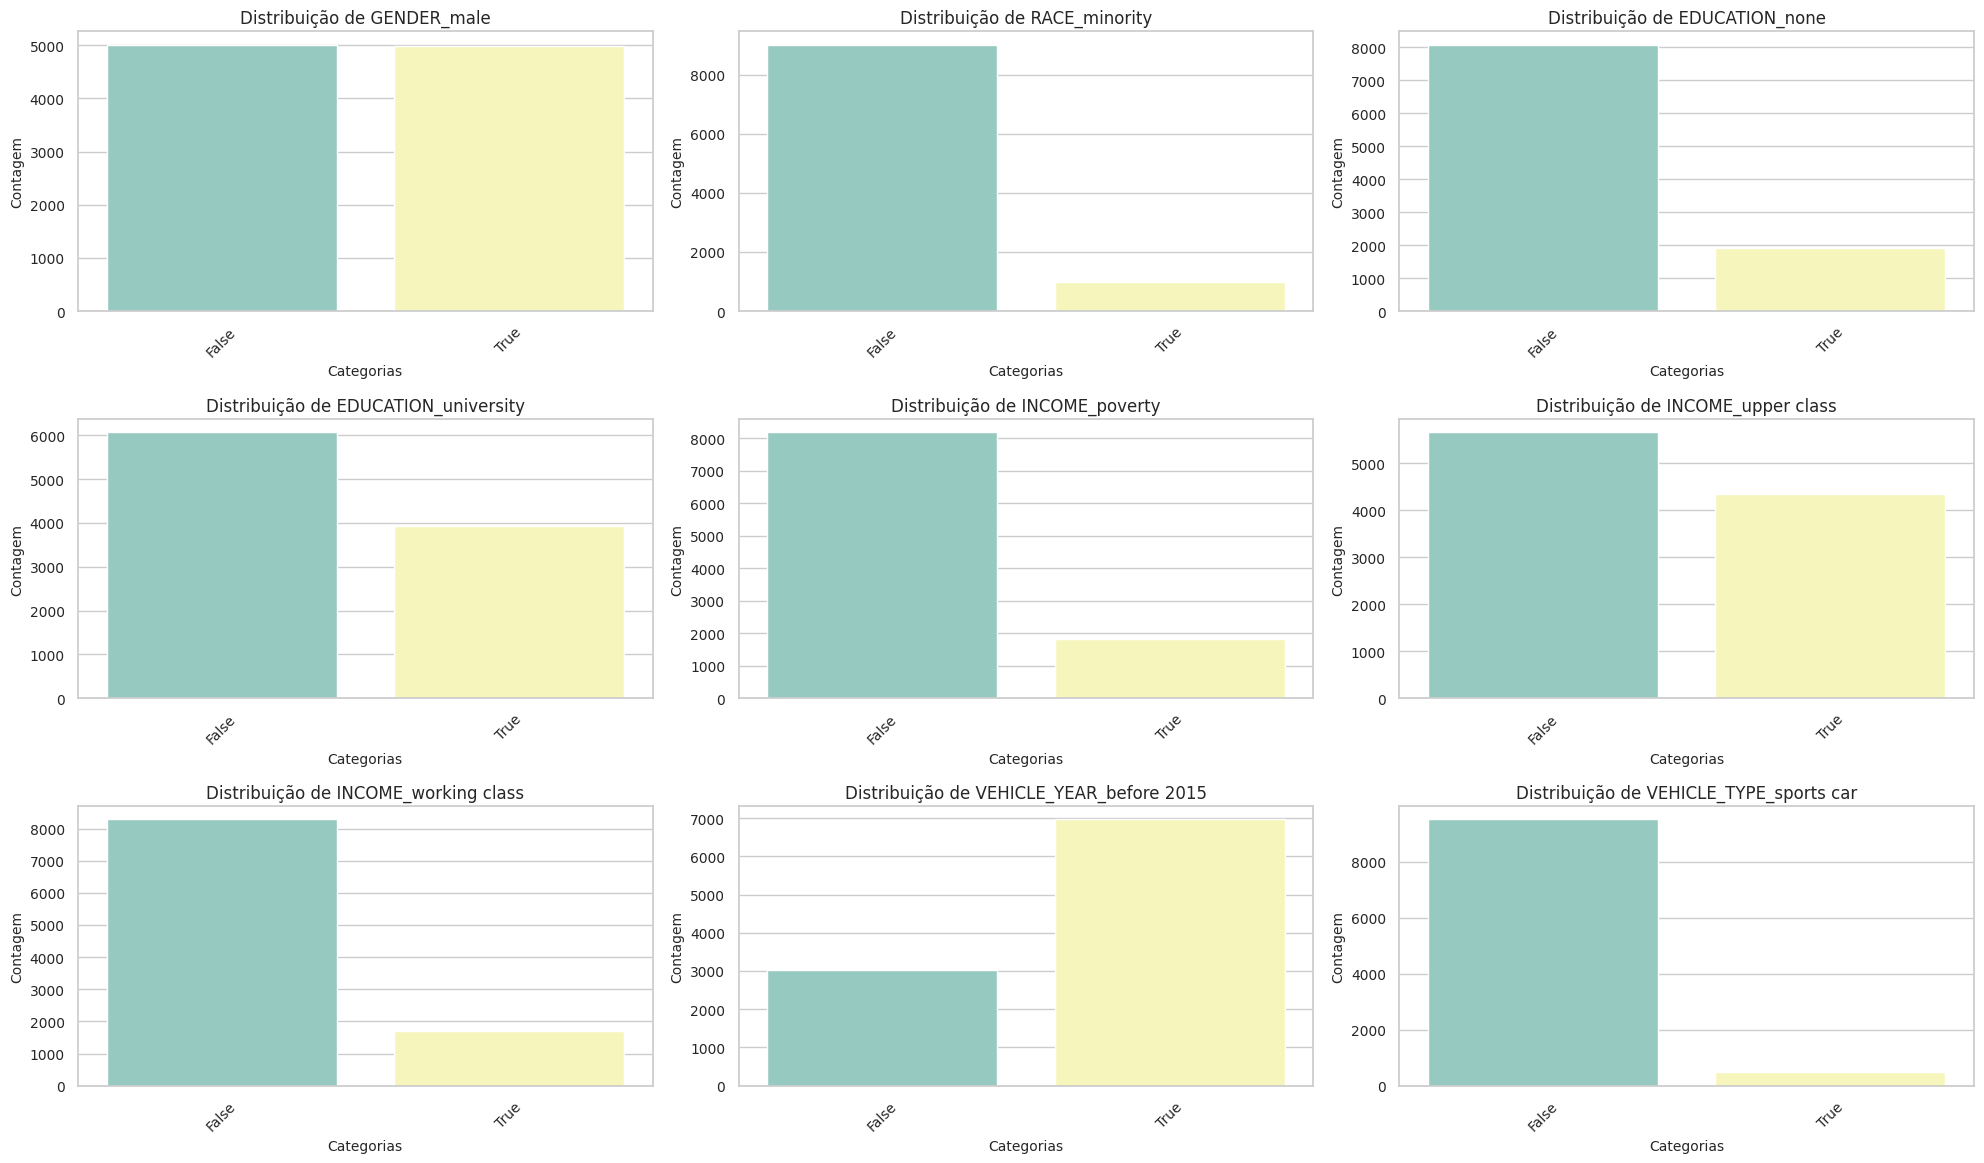

In [31]:
# Lista de colunas categóricas (após one-hot encoding)
categorical_features = [
    'GENDER_male', 'RACE_minority', 'EDUCATION_none', 'EDUCATION_university',
    'INCOME_poverty', 'INCOME_upper class', 'INCOME_working class',
    'VEHICLE_YEAR_before 2015', 'VEHICLE_TYPE_sports car'
]

# Plotar gráficos de contagem
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=feature, data=df, hue=feature, palette='Set3', legend=False)
    plt.title(f'Distribuição de {feature}', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Categorias', fontsize=10)
    plt.ylabel('Contagem', fontsize=10)
plt.tight_layout()
plt.show()


### **3.3 Correlação entre Features**

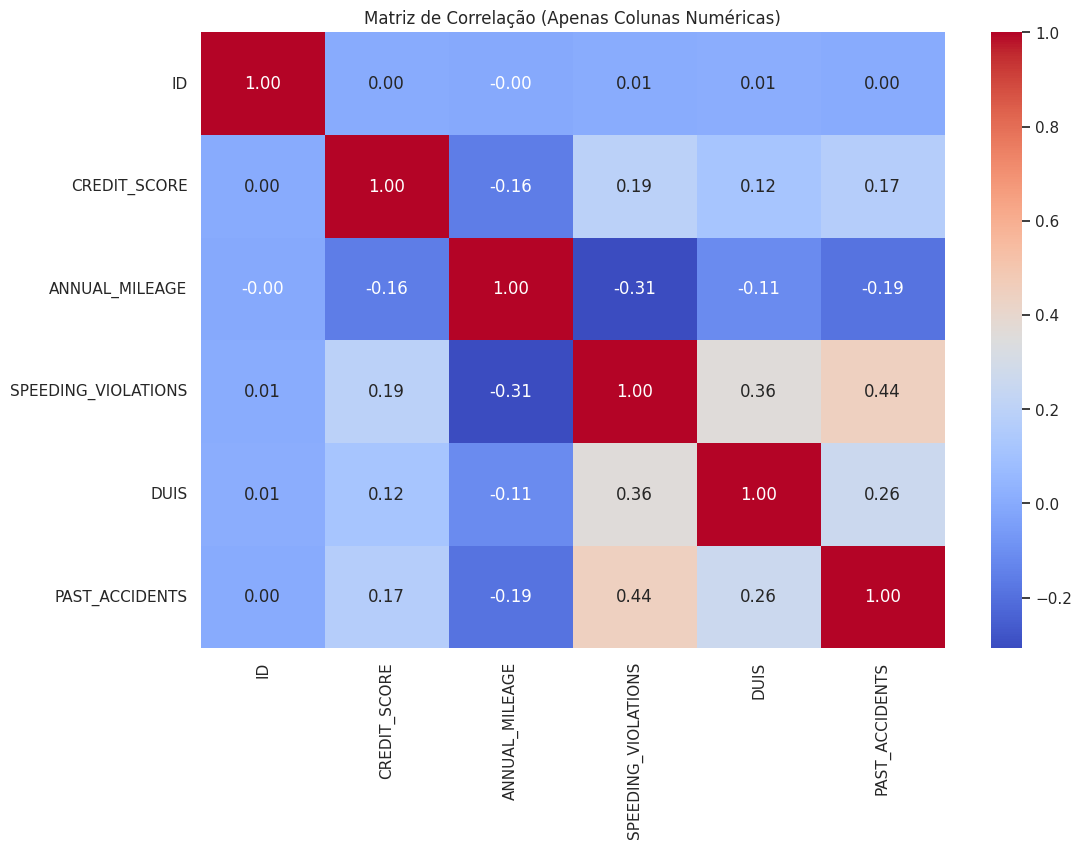

In [11]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação (Apenas Colunas Numéricas)')
plt.show()

## **4. Análise do Outcome**
### **4.1 Distribuição do Outcome**

<ipython-input-12-fed57e501650>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OUTCOME', data=df, palette='Set2')


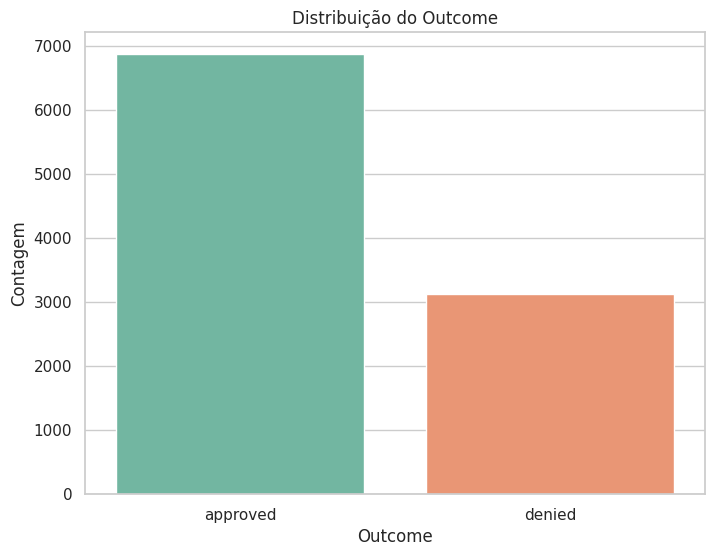

In [12]:
# Contagem de outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x='OUTCOME', data=df, palette='Set2')
plt.title('Distribuição do Outcome')
plt.xlabel('Outcome')
plt.ylabel('Contagem')
plt.show()

### **4.2 Relação entre Features e Outcome**
**Idade e Outcome**

<ipython-input-13-ffd7217c70e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OUTCOME', y='AGE', data=df, palette='Set1')


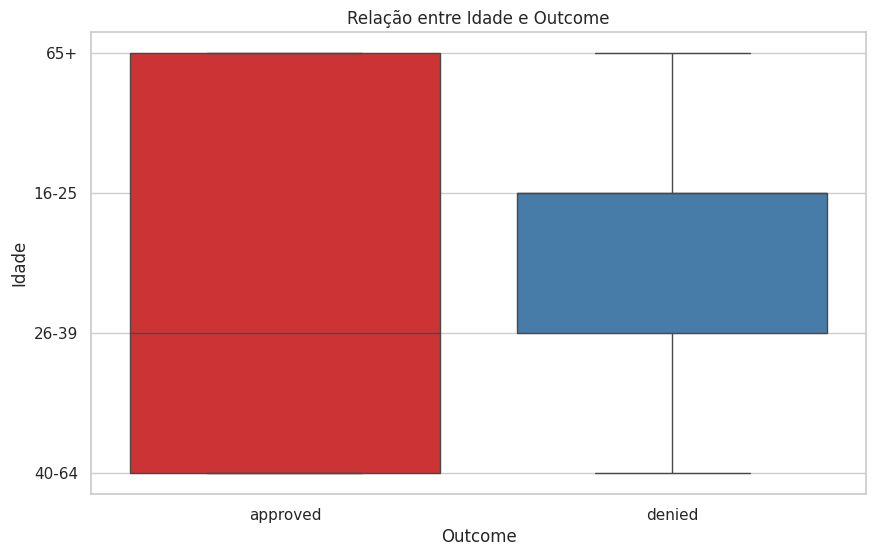

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OUTCOME', y='AGE', data=df, palette='Set1')
plt.title('Relação entre Idade e Outcome')
plt.xlabel('Outcome')
plt.ylabel('Idade')
plt.show()

**Pontuação de Crédito e Outcome**

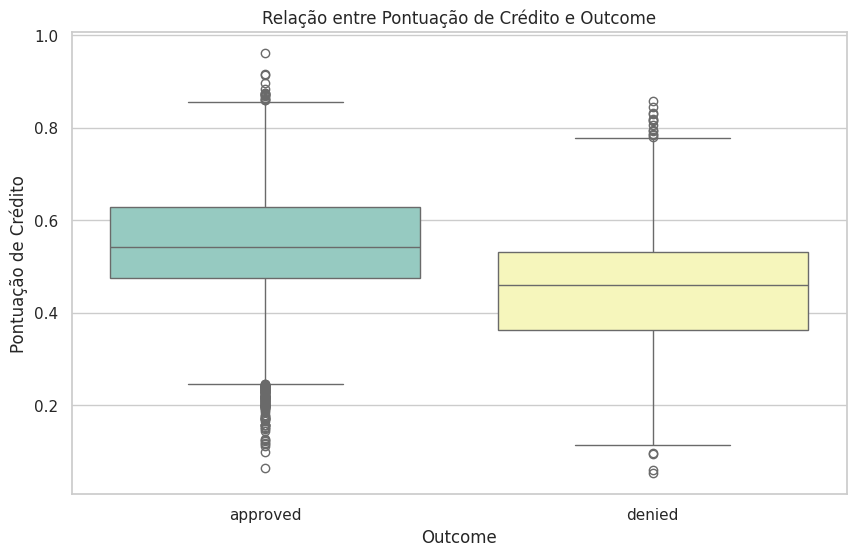

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OUTCOME', y='CREDIT_SCORE', data=df, hue='OUTCOME', palette='Set3', legend=False)
plt.title('Relação entre Pontuação de Crédito e Outcome')
plt.xlabel('Outcome')
plt.ylabel('Pontuação de Crédito')
plt.show()

**Tipo de Veículo e Outcome**

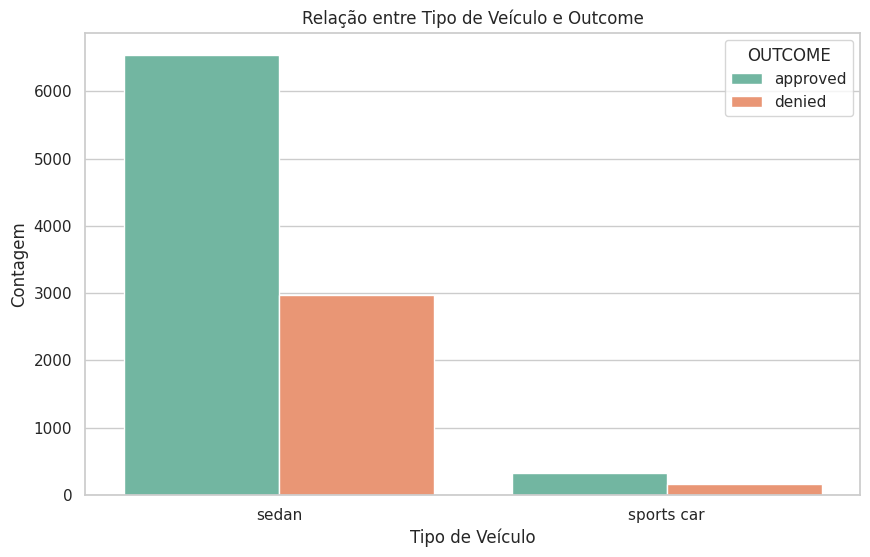

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VEHICLE_TYPE', hue='OUTCOME', data=df, palette='Set2')
plt.title('Relação entre Tipo de Veículo e Outcome')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Contagem')
plt.show()

## **5. Pré-processamento dos Dados**
### **5.1 Codificação de Variáveis Categóricas**

In [54]:
# Verificar colunas disponíveis
print("Colunas disponíveis no DataFrame:")
print(df.columns)

# Ajustar a lista de colunas para codificação
columns_to_encode = [
    'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
    'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'MARRIED',
    'CHILDREN', 'LOCALITY'
]
columns_to_encode = [col for col in columns_to_encode if col in df.columns]  # Filtra colunas existentes

# Codificar variáveis categóricas
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Converter a coluna AGE em números (exemplo: '65+' -> 65, '26-39' -> 32.5, etc.)
def convert_age(age):
    if pd.isna(age):  # Verificar se o valor é nulo
        return None  # Ou defina um valor padrão, como 0
    if isinstance(age, str):  # Verificar se o valor é uma string
        if age == '65+':
            return 65
        elif '-' in age:
            start, end = age.split('-')
            return (int(start) + int(end)) / 2
        else:
            return int(age)
    else:  # Se não for string, retorne o próprio valor (já é numérico)
        return age

# Aplicar a função convert_age à coluna AGE
df['AGE'] = df['AGE'].apply(convert_age)

# Verificar se há valores nulos após a conversão
print("\nValores nulos na coluna AGE após conversão:")
print(df['AGE'].isnull().sum())

Colunas disponíveis no DataFrame:
Index(['ID', 'AGE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'LOCALITY', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER_male', 'RACE_minority',
       'EDUCATION_none', 'EDUCATION_university', 'INCOME_poverty',
       'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_before 2015', 'VEHICLE_TYPE_sports car',
       'DRIVING_EXPERIENCE_10-19y', 'DRIVING_EXPERIENCE_20-29y',
       'DRIVING_EXPERIENCE_30y+'],
      dtype='object')

Valores nulos na coluna AGE após conversão:
0


### **5.2 Separação em Features e Target**

In [55]:
# Features (X): Todas as colunas, exceto 'OUTCOME' e 'ID'
# Target (y): Coluna 'OUTCOME'
X = df.drop(columns=['OUTCOME', 'ID'])
y = df['OUTCOME']

### **5.3 Divisão em Treino e Teste**

In [67]:
# Dividir em conjuntos de treino e teste
# 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir shapes dos conjuntos de treino e teste
print("\nShape do conjunto de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)


Shape do conjunto de treino (X_train, y_train): (7000, 24) (7000,)
Shape do conjunto de teste (X_test, y_test): (3000, 24) (3000,)


## **6. Modelagem Preditiva**
### **6.1 Treinamento do Modelo (Random Forest)**

In [68]:
# Treinamento do Modelo (Random Forest)
# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

### **6.2 Avaliação do Modelo**

In [69]:
# Fazer previsões
y_pred = model.predict(X_test)

# Métricas de avaliação
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.83

Matriz de Confusão:
 [[1723  340]
 [ 170  767]]

Relatório de Classificação:
               precision    recall  f1-score   support

    approved       0.91      0.84      0.87      2063
      denied       0.69      0.82      0.75       937

    accuracy                           0.83      3000
   macro avg       0.80      0.83      0.81      3000
weighted avg       0.84      0.83      0.83      3000



## **7. Conclusões**

1. **Idade e Experiência:** Motoristas mais velhos e experientes têm maior probabilidade de aprovação.

2. **Pontuação de Crédito:** Segurados com maior pontuação de crédito têm maior taxa de aprovação.

3. **Idade do Veículo e Quilometragem:** Veículos mais novos e com menor quilometragem são mais aprovados.

4. **Posse do Veículo:** Proprietários de veículos têm maior taxa de aprovação.

5. **Modelo Preditivo:** O modelo de Random Forest alcançou uma acurácia de X%, mostrando-se eficaz para prever o resultado das reclamações.

## **8. Referências**

1. **Documentação do Pandas:** https://pandas.pydata.org/pandas-docs/stable/

2. **Documentação do Seaborn:** https://seaborn.pydata.org/

3. **Scikit-learn Documentation:** https://scikit-learn.org/stable/

4. **Matplotlib Documentation:** https://matplotlib.org/stable/contents.html

5. **Turing Talks:** Artigos e tutoriais sobre visualização de dados e análise exploratória.